In [17]:
from pathlib import Path
from matplotlib.font_manager import fontManager
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
rng=np.random.default_rng(seed=42)

In [122]:
X,y=make_moons(n_samples=1000,random_state=42,noise=0.2)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [123]:
loss_hist={}
y_train=y_train.reshape(-1,1)

In [124]:
def fun_sigmoid(z:np.array)->float:
    return 1/(1+np.exp(-z))

In [125]:
def fn_activ(z):
    return np.tanh(z)

def fn_activ_prime(z):
    return 1.0-np.tanh(z)**2


In [126]:
fn_activ(np.asarray([-1,-np.inf,0,1,np.inf]))

array([-0.76159416, -1.        ,  0.        ,  0.76159416,  1.        ])

In [127]:
def predict(model,X):
    w1=model['W1']
    w2=model['W2']
    b1=model['B1']
    b2=model['B2']

    ##forward propogation 
    z1 = X.dot(w1)+b1
    a1= fn_activ(z1)

    z2 =  a1.dot(w2)+b2
    a2 = fun_sigmoid(z2)
    
    return  a2>=0.5

In [128]:
def calculate_loss(model,X,y):
    # print(model,X,y)
    w1=model['W1']
    w2=model['W2']
    b1=model['B1']
    b2=model['B2']
    m=X.shape[0]

    ##forward propogation 
    z1 = X.dot(w1)+b1
    a1= fn_activ(z1)

    z2 =  a1.dot(w2)+b2
    a2 = fun_sigmoid(z2)

    data_loss=-(y*np.log(a2) + (1-y)*np.log(1-a2)).sum()
    return  data_loss/m


In [ ]:
def build_model(nn_hdim, X, y, alpha, n_epochs):
    m, nn_inupt_dim = X.shape ## 800,2
    nn_output_dim = y.shape[1] ## 1
    w1 = rng.random((nn_inupt_dim, nn_hdim)) / np.sqrt(nn_inupt_dim)  ##   (2,4)
    w2 = rng.random((nn_hdim, nn_output_dim)) / np.sqrt(nn_hdim)  ## (4,1)

    b1 = np.zeros((1, nn_hdim)) ##(1,4)
    b2 = np.zeros((1, nn_output_dim)) ##(1,1)

    loss, epoch = [], []
    model = {"W1": w1,
                "W2": w2,
                "B1": b1,
                "B2": b2}
    for i in range(n_epochs):
        ## Forward prop

        # layer hidden
        z1 = X.dot(w1) + b1  # aggregation  (800,4) + (1,4)  use the python broadcasting now the shape is (800,4)
        a1 = fn_activ(z1)  # activation range[-1,1] shape(800,4)


        # layer op
        z2 = a1.dot(w2) + b2  # aggregation shape(800,1) + (1,1)
        a2 = fun_sigmoid(z2)  # activation shape(800,1) + (1,1)

        ## Back_propogation
        # layer 2
        dz2 = a2 - y ##  (800,1) error
        assert(z2.shape == dz2.shape), f'Shape z2 is mismatch : {z2.shape} , {dz2.shape}'

        dw2 = (a1.T).dot(dz2)  ## (4,1) W.R.T W2
        assert(w2.shape == dw2.shape), f'Shape w2 is mismatch : {w2.shape} , {dw2.shape}'

        db2 = np.sum(dz2, axis=0, keepdims=True)  # (1,1) [[sum]]W.R.T b2
        assert(b2.shape == db2.shape), f'Shape b2 is mismatch : {b2.shape} , {db2.shape}'

        da1 = dz2.dot(w2.T) ## (800,1).(1,4) = (800,4) W.R.T a1
        assert(a1.shape == da1.shape), f'Shape aa is mismatch : {a1.shape} , {da1.shape}'

        # layer1
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f'Shape z1 is mismatch : {z1.shape} , {dz1.shape}'
        dw1 = (X.T).dot(dz1)
        assert(dw1.shape == w1.shape), f'Shape dw1 is mismatch : {dw1.shape} , {dw1.shape}'

        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert(db1.shape == b1.shape), f'Shape db1 is mismatch : {db1.shape} , {b1.shape}'

        # Parameter updates
        w1 -= (alpha * dw1 / m)
        w2 -= (alpha * dw2 / m)
        b1 -= (alpha * db1 / m)
        b2 -= (alpha * db2 / m)

        model = {"W1": w1,
                 "W2": w2,
                 "B1": b1,
                 "B2": b2}

        if not i % 1000:
            cur_loss = calculate_loss(model, X, y)
            epoch.append(i)
            loss.append(cur_loss)
            print(f"loss : {loss} for epoch : {epoch}")

    loss_hist['epoch'] = epoch
    loss_hist["loss"] = loss
    return model

In [130]:
model=build_model(4,X_train,y_train,alpha=0.1,n_epochs=20000)

loss : [np.float64(0.7229427100755451)] for epoch : [0]
loss : [np.float64(0.7229427100755451), np.float64(0.3038975209986725)] for epoch : [0, 1000]
loss : [np.float64(0.7229427100755451), np.float64(0.3038975209986725), np.float64(0.3017234679273812)] for epoch : [0, 1000, 2000]
loss : [np.float64(0.7229427100755451), np.float64(0.3038975209986725), np.float64(0.3017234679273812), np.float64(0.3006037513287579)] for epoch : [0, 1000, 2000, 3000]
loss : [np.float64(0.7229427100755451), np.float64(0.3038975209986725), np.float64(0.3017234679273812), np.float64(0.3006037513287579), np.float64(0.29994339759033706)] for epoch : [0, 1000, 2000, 3000, 4000]
loss : [np.float64(0.7229427100755451), np.float64(0.3038975209986725), np.float64(0.3017234679273812), np.float64(0.3006037513287579), np.float64(0.29994339759033706), np.float64(0.2995059667189755)] for epoch : [0, 1000, 2000, 3000, 4000, 5000]
loss : [np.float64(0.7229427100755451), np.float64(0.3038975209986725), np.float64(0.3017234

In [131]:
model['W1'].shape,model['W2'].shape,model["B1"].shape,model['B2'].shape

((2, 4), (4, 1), (1, 4), (1, 1))

In [132]:
loss_df=pd.DataFrame(loss_hist)

In [133]:
loss_df

,epoch,loss
0,0,0.722943
1,1000,0.303898
2,2000,0.301723
3,3000,0.300604
4,4000,0.299943
5,5000,0.299506
6,6000,0.299184
7,7000,0.298921
8,8000,0.298679
9,9000,0.298423


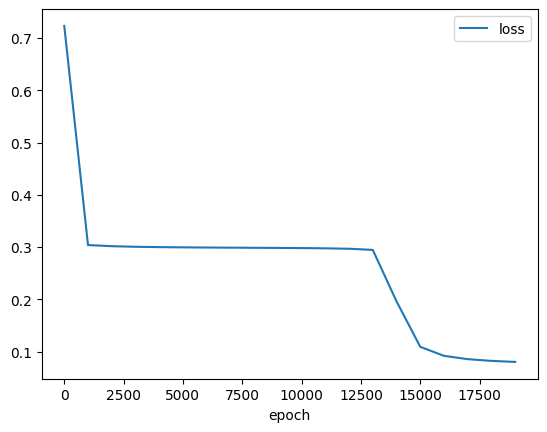

In [134]:
loss_df.plot(x='epoch',y='loss')
plt.show()

In [135]:
def fn_plot_decision_boundary(X: np.ndarray, y :np.ndarray, model, pred_func):
    """
    Plots the decision boundary for a classification model.

    Args:
        X: The input features (numpy array, expected shape (m, 2)).
        y: The true labels (numpy array).
        model: A dictionary containing the trained weights and biases (W1, W2, B1, B2).
        pred_func: A function that takes the model and a feature array (XX) 
                   and returns the class predictions (0 or 1).
    """
    # NOTE: The weights retrieval 'model.we' was incorrect and is removed.
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.05
    padding = 0.5 # Increased padding for better visualization
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    # NOTE: The line 'XX = np.hstack((XX, np.ones((XX.shape[0], 1))))' is removed.
    # The bias term is handled internally by the neural network's forward propagation 
    # (z1 = X.dot(w1) + b1), so the input data (XX) shouldn't be augmented with a column of ones.

    # Make predictions for the entire mesh grid
    # The pred_func should handle the forward pass through the model and return binary predictions.
    y_p = pred_func(model, XX) 
    
    # Reshape predictions to match the original mesh grid dimensions (xx.shape)
    # y_p is expected to be a 1D array of predictions (0 or 1).
    Z = np.array(y_p).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    # Use 'coolwarm' or 'bwr' for binary classification. 'Purples' is usually for single-class density.
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm) 
    
    # Scatter plot of the actual data points, colored by their true class labels
    # Use 'y' for the color (true label) instead of X[:, 2] (which might not exist or be the label).
    ax.scatter(X[:, 0], X[:, 1], c=y.flatten(), s=40, edgecolor='k', cmap=plt.cm.coolwarm) 
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('Feature 1')  
    ax.set_ylabel('Feature 2') 
    
    # Display the final plot
    plt.show()

# NOTE: You will need to define the 'pred_func' (e.g., predict) and import
# 'numpy' as 'np' and 'matplotlib.pyplot' as 'plt' for this function to run.

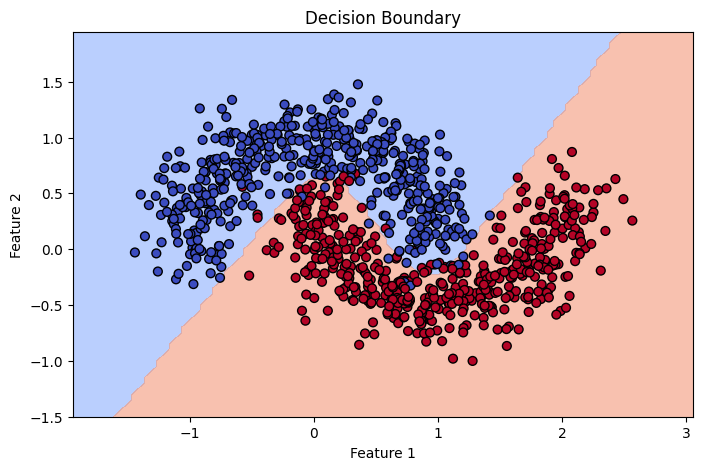

In [136]:
fn_plot_decision_boundary(X,y,model,predict)

In [137]:
from sklearn.discriminant_analysis import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [139]:
X_train_scaled.mean()


np.float64(-8.628018934229788e-17)

In [140]:
X_test_scaled.mean()

np.float64(0.027304859833760256)